# **Statistical Learning for Automation Systems**

       
## *Prof. Simone Formentin*

___

# Principal Component Analysis with Python - Case Study



## PCA Review

PCA consists in a linear transformation of the available input data and attempts to find out which features mostly explain the variance in the data. 

<img src='PCA.png' />

## Import Data Analysis and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import Dataset

We'll work with the built-in Breast Cancer dataset from Scikit Learn since it has a very high number of features.

In [2]:
from sklearn.datasets import load_breast_cancer                # Import load_breast_cancer

In [3]:
cancer = load_breast_cancer()                                  # Assign breast cancer dataset to variable 'cancer'

In [4]:
cancer                                                         # 'cancer' is a variable of type 'Dictionary'

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])            # Create a Pandas DataFrame containing cancer data with columns named as features

In [10]:
df.head()                                                                       # Show DataFrame header

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Principal Component Analysis

As intuitive, it is difficult to visualize high dimensional data, so we can use PCA for dimensionality reduction. 

Before doing this, we need to remove bias and scale our data so that each feature has unit variance.

### Data Pre-Processing

Scikit-Learn function named StandardScaler() standardizes features by removing the bias and scaling to unit variance (it automatically performs input centering and input normalization). 

In [13]:
from sklearn.preprocessing import StandardScaler      # StandardScaler() import

In [14]:
scaler = StandardScaler()                             # StandardScaler() instantiation
scaler.fit(df)                                        # fit() method computes the mean and std. dev. to be used for later scaling

StandardScaler()

In [15]:
scaled_data = scaler.transform(df)                    # transform() method performs standardization by centering and scaling original input data

### Singular Value Decomposition

In [16]:
U, gamma, V = np.linalg.svd(scaled_data, full_matrices=False)          # Compute SVD for scaled_data matrix, obtaining as output the matrices for its factorization: scaled_data = U * diag(gamma) * V'

In [17]:
gamma                           # gamma is an array of dimension 30 containing the ordered singular values of scaled_data matrix

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663, 16.46800391, 15.4017255 , 14.12602481,
       12.93205441, 12.19019359, 11.71889139,  9.4519063 ,  7.31866075,
        6.74106325,  5.81360925,  5.47175363,  5.30591648,  4.21066503,
        4.12971871,  3.95133143,  3.72155031,  3.20519874,  2.96796958,
        2.15709923,  1.98150547,  0.95096438,  0.65273958,  0.27514088])

In [18]:
gamma.shape

(30,)

In [19]:
Gamma = np.diag(gamma)           # Diagonal matrix of dimension 30 * 30 with ordered singular values on the main diagonal
Gamma.shape

(30, 30)

Text(0.5, 1.0, 'Singular Values Plot')

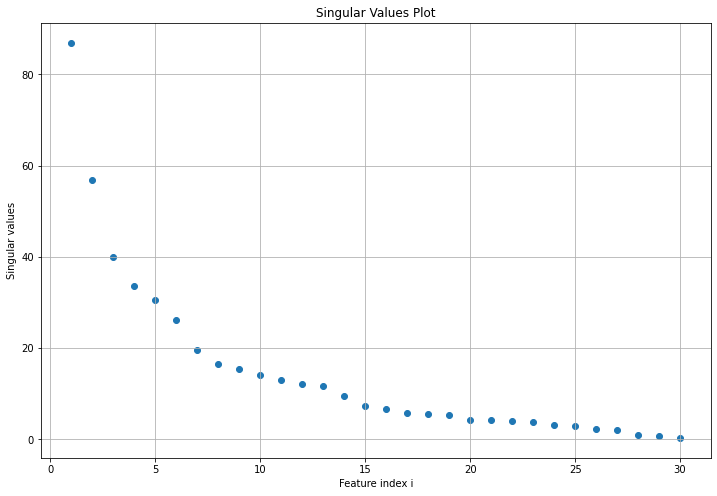

In [20]:
# Plot ordered singular values

plt.figure(figsize = (12,8))

plt.scatter(range(1, len(gamma)+1), gamma)

plt.grid()
plt.ylabel('Singular values')
plt.xlabel('Feature index i')
plt.title('Singular Values Plot')

Most of the information is contained in the first two principal components. We can use PCA to find the first two principal components and visualize the data in this new, two-dimensional space, with a single scatter plot.

### PCA Algorithm

Instantiate a PCA object, find the principal components using the fit() method, then apply the rotation and dimensionality reduction by calling transform().

It is also possible to specify how many components we want to keep when creating the PCA object.

In [21]:
from sklearn.decomposition import PCA                 # PCA() import

In [22]:
pca = PCA(n_components = 2)                           # PCA() object instantiation (specifying the number of desired components)

In [23]:
pca.fit(scaled_data)                                  # fit(X) method fits the model with X (it finds the principal components)

PCA(n_components=2)

Now we can transform data to the first 2 principal components.

In [24]:
x_pca = pca.transform(scaled_data)                     # transform(X) method applies dimensionality reduction to X

In [25]:
scaled_data.shape                                      # Dimensions of standardized dataset before PCA application

(569, 30)

In [26]:
x_pca.shape                                            # Dimensions of dataset after PCA application

(569, 2)

In [27]:
x_pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])        # Pandas Dataframe containing data in the reduced Feature Space
x_pca_df.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [28]:
x_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     569 non-null    float64
 1   PC2     569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


Observation: We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

## Plot Data in the Reduced Feature Space

(-10.0, 15.0)

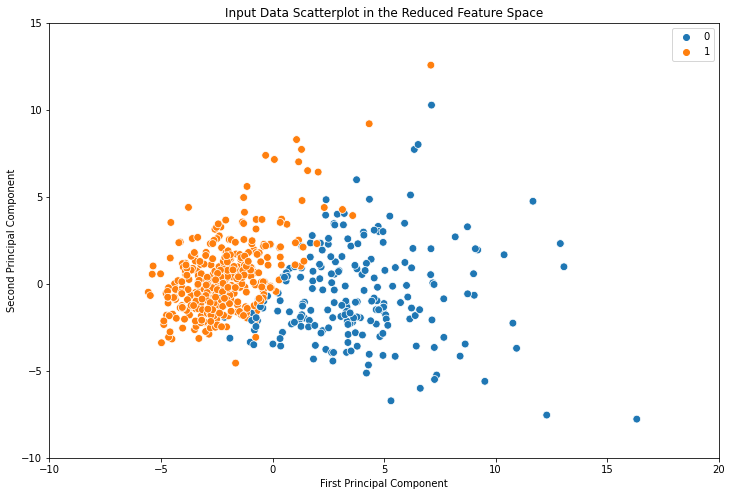

In [29]:
plt.figure(figsize=(12,8))

sns.scatterplot(x_pca[:,0] , x_pca[:,1], hue = cancer['target'], s = 60)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Input Data Scatterplot in the Reduced Feature Space')
plt.xlim([-10, 20])
plt.ylim([-10, 15])

By using these two principal components, we can easily separate the two classes (target = 0, target = 1).

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to linear combinations of the original features. The components themselves are stored as an attribute of the fitted PCA object:

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component and each column relates back to the original features. 

We can visualize this relationship with a heatmap.

In [31]:
df_comp = pd.DataFrame(pca.components_ , columns = cancer['feature_names'])                      # Create a Pandas DataFrame containing the two principal components

In [32]:
df_comp                                                      # Show df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


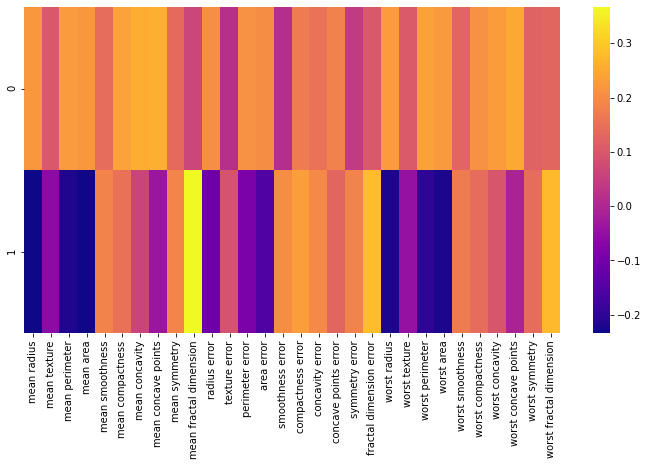

In [33]:
# Heatmap Plot
plt.figure(figsize=(12,6))
sns.heatmap(df_comp , cmap='plasma')

This heatmap and the color bar basically represent the correlation between the various features and the principal component itself.

## Conclusion

The presented case study is an example of application of PCA to a dataset characterized by a very high-dimensional feature space. The drawback relates to the poor interpretability of what principal components represent.